In [136]:
import importlib
import sys
import os
import numpy as np
import math
from skimage import exposure

from Helpers import loadData, saveData, multiplot
importlib.reload(sys.modules['Helpers.multiplot'])
importlib.reload(sys.modules['Helpers'])

import matplotlib.pyplot as plt 

In [4]:
#data = loadData(location = r"C:\Users\Lab User\Desktop\temp1\Granular-Compression\Data", fileName = "downscale_17.hdf5")
data = loadData(r'/home/snow/Coding/Granular-Compression/Data','processedDown_17.hdf5')

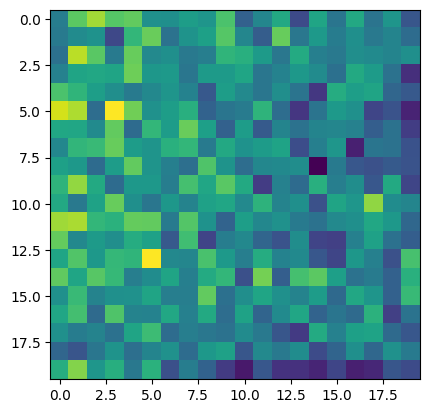

In [63]:
m,n = enumerate(args)
#print(m)
#print(n)
for i,img in enumerate(args):
    plt.imshow(img)

['ArtistList', '_AxesBase__clear', '_PROPERTIES_EXCLUDED_FROM_SET', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__firstlineno__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__static_attributes__', '__str__', '__subclasshook__', '__weakref__', '_add_text', '_adjustable', '_agg_filter', '_alias_map', '_alpha', '_anchor', '_animated', '_aspect', '_autotitlepos', '_axes', '_axes_locator', '_axis_map', '_axis_names', '_axisbelow', '_box_aspect', '_callbacks', '_check_no_units', '_children', '_clipon', '_clippath', '_cm_set', '_colorbars', '_convert_dx', '_current_image', '_different_canvas', '_errorevery_to_mask', '_facecolor', '_fill_between_process_units', '_fill_between_x_or_y', '_forward_navigation_events', '_frameon', '_fully_

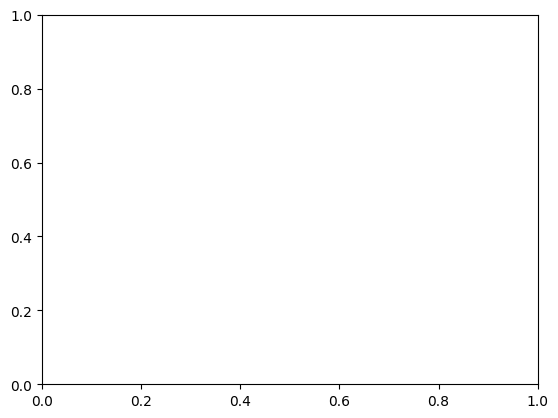

In [92]:
fig, ax = plt.subplots()
print(dir(ax))

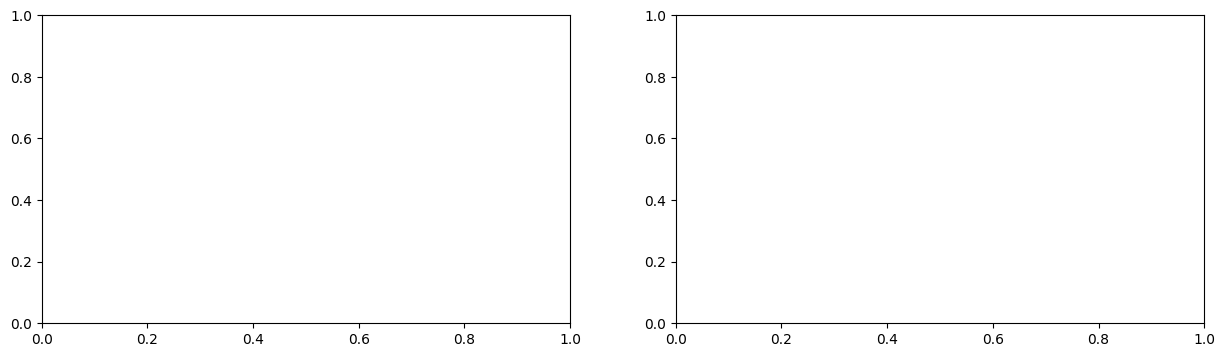

In [93]:
args = (data[20:40,20:40,20],data[120:140,120:140,20])
size = None
fig = (15,4)

if size == None:
    rows,cols = 1,len(args)
else:
    rows,cols = size

fig, ax = plt.subplots(nrows=rows,ncols=cols,figsize=fig)
axs = ax.ravel()
for i,img in enumerate(args):
    axs[i].data = img

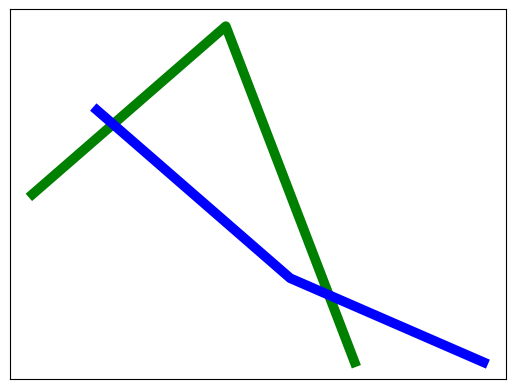

In [180]:
x1 = [5, 8, 10]
y1 = [12, 16, 8]
x2 = [6, 9, 12]
y2 = [14, 10, 8]
plt.plot(x1, y1, 'g', linewidth=7)
plt.plot(x2, y2, 'b', linewidth=7)
plt.xticks([]) 
plt.yticks([]) 
plt.show()

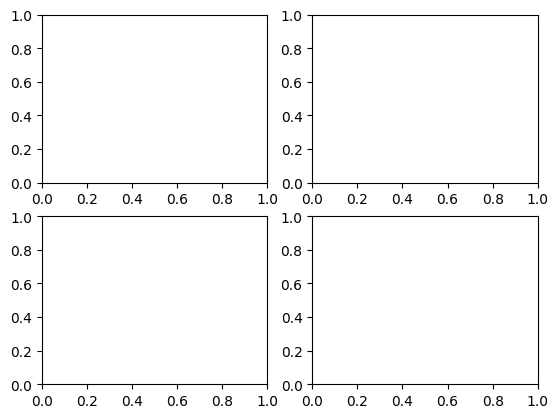

In [ ]:
fig, axs = plt.subplots(2,2)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'removeprefix',
 'removesuffix',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'stri

In [211]:

from Helpers import loadData, saveData, multiplot
importlib.reload(sys.modules['Helpers.multiplot'])
importlib.reload(sys.modules['Helpers'])


<module 'Helpers' from '/home/snow/Coding/Granular-Compression/Identification/PreProcessing/Helpers/__init__.py'>

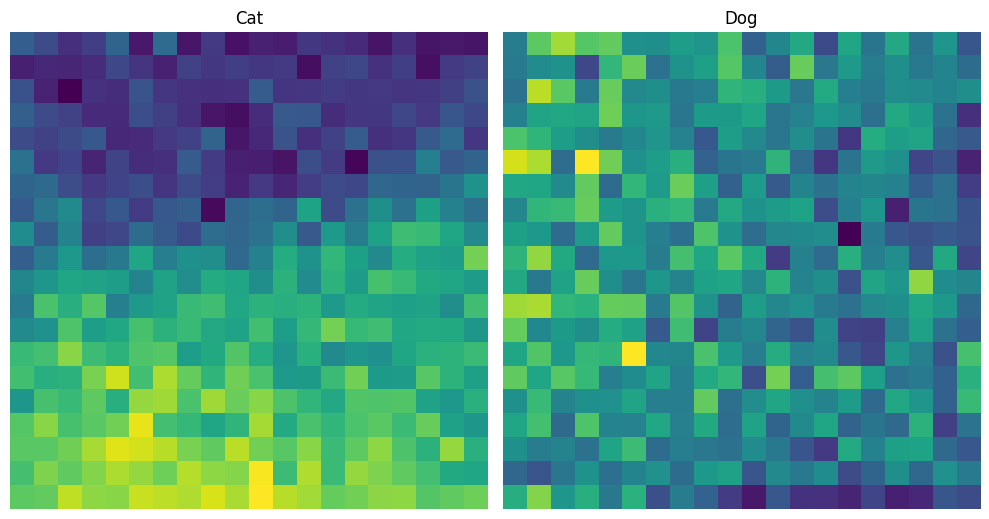

In [ ]:
multiplot(data[20:40,20:40,20],data[120:140,120:140,20], plots=(1,2),size=(10,10),titles=['Cat','Dog']

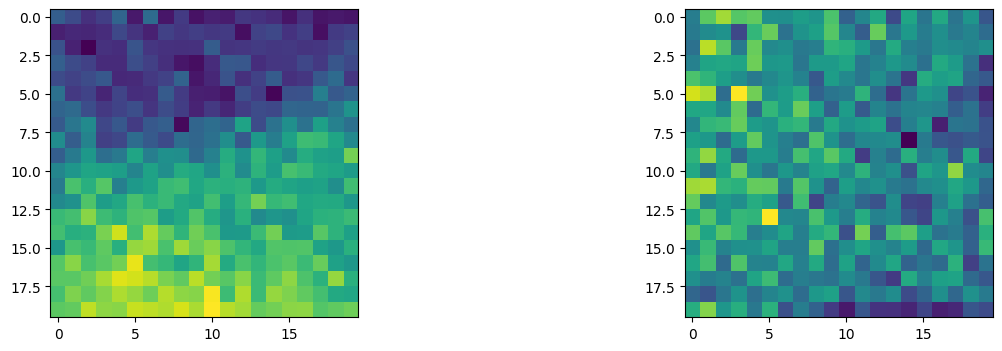

In [128]:
args = (data[20:40,20:40,20],data[120:140,120:140,20])
size = None
fig = (15,4)

if size == None:
    rows,cols = 1,len(args)
else:
    rows,cols = size

fig, ax = plt.subplots(nrows=rows,ncols=cols,figsize=fig)
axs = ax.ravel()

for i,img in enumerate(args):
    axs[i].imshow(img)

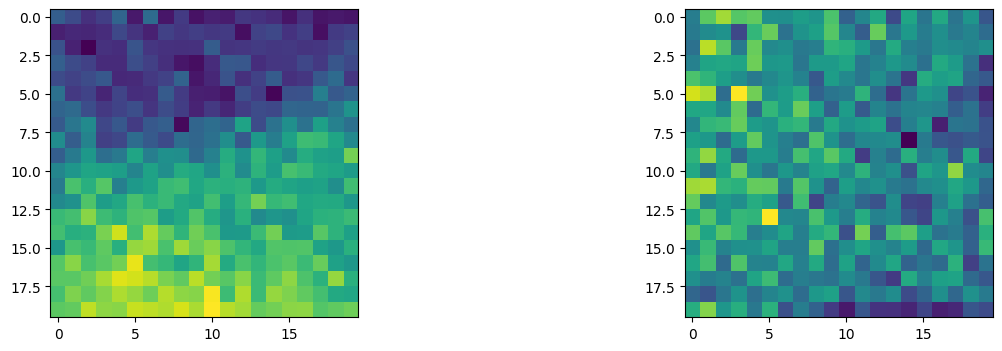

In [127]:


display(fig)

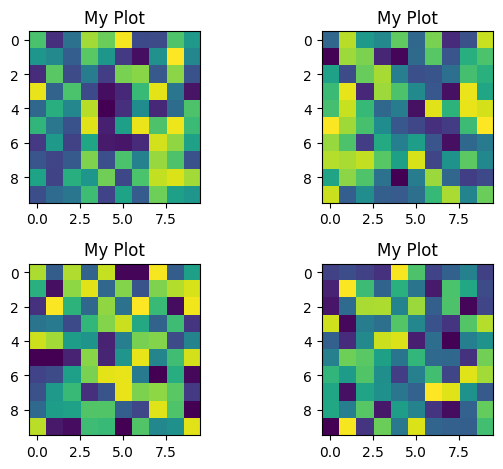

In [96]:
fig, axes = plt.subplots(2, 2)

# Store data in each axes
axes[0, 0].my_data = np.random.rand(10, 10)
axes[0, 1].my_data = np.random.rand(10, 10)
axes[1, 0].my_data = np.random.rand(10, 10)
axes[1, 1].my_data = np.random.rand(10, 10)

# Plot all of them
for ax in axes.flat:  # .flat iterates through all axes
    ax.imshow(ax.my_data)
    ax.set_title('My Plot')

plt.tight_layout()  # Adjust spacing
plt.show()

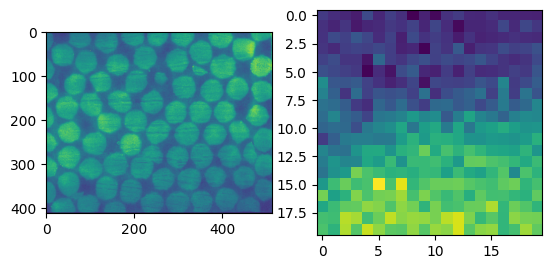

In [8]:
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(img[20:40,20:40])

In [55]:
axis = 'c'

sR,sC,sZ = np.shape(data)
collapseDict = {
'r': [(1,2), sR, (slice(None), np.newaxis, np.newaxis)],
'c': [(0,2), sC, (np.newaxis, slice(None), np.newaxis)],
'z': [(0,1), sZ, (np.newaxis, np.newaxis, slice(None))]
}
    
info = collapseDict[axis]
axialMeans = np.mean(data,axis=info[0])
centralMean = axialMeans[math.floor(info[1]/2)]
rescales = centralMean/axialMeans
rescaleArr = np.broadcast_to(rescales[info[2]], (sR, sC, sZ))
localNormed = data * rescaleArr
dataNorm = np.clip(exposure.rescale_intensity(localNormed, in_range='image', out_range=(0,1)), 0, 1)

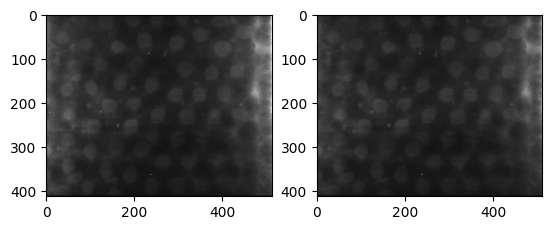

In [58]:
plt.subplot(1,2,1)
plt.imshow(data[:,:,0],cmap='grey')
plt.subplot(1,2,2)
plt.imshow(localNormed[:,:,0],cmap='grey')

In [45]:
A = np.arange(start=1,stop=10)
sS = len(A)
dog = np.broadcast_to(A[:,np.newaxis,np.newaxis], (sS,3,1))

print(f'A={A}')
#print(f'dog={dog}')
print(dog[:,:,0])
print(dog.shape)

A=[1 2 3 4 5 6 7 8 9]
[[1 1 1]
 [2 2 2]
 [3 3 3]
 [4 4 4]
 [5 5 5]
 [6 6 6]
 [7 7 7]
 [8 8 8]
 [9 9 9]]
(9, 3, 1)


In [ ]:

axis = 'r'

sR,sC,sZ = np.shape(data)
collapseDict = {'r':[(1,2), sR, (:,np.newaxis,np.newaxis)], 'c':[(0,2),sC], 'z':[(0,1),sZ]}
info = collapseDict[axis]
    
    

axialMeans = np.mean(data,axis=info[0])
centralMean = axialMeans[math.floor(info[1]/2)]
rescales = centralMean/axialMeans
rescaleArr = np.broadcast_to(axialMeans[:, np.newaxis, np.newaxis], (sR, sC, sZ))


dataColNorm = data*rescales[:, np.newaxis, np.newaxis]
meow = np.ndarray.flatten(dataColNorm)
dataNorm = np.clip(exposure.rescale_intensity(dataColNorm, in_range='image', out_range=(0,1)), 0, 1)

SyntaxError: invalid syntax (2136967927.py, line 14)

In [55]:
saveData(data, r"C:\Users\Lab User\Desktop\temp1\Granular-Compression\Data", 'drugs.hdf5')

In [1]:
import numpy as np

In [ ]:
a = np.array([[[1, 2, 3 ],[4, 5, 6 ],[7, 8, 9 ]],  # Yellow represents row
              [[10,11,12],[13,14,15],[16,17,18]],  # Blue   represents column 
              [[19,20,21],[22,23,24],[25,26,27]]]) # Yellow
aa
print(a[0][:][:])

dog = np.mean(a,axis=(1))
print(dog)

cat = np.mean(dog,axis=(2))
print(cat)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 4.  5.  6.]
 [13. 14. 15.]
 [22. 23. 24.]]


AxisError: axis 2 is out of bounds for array of dimension 2